(3, 2)


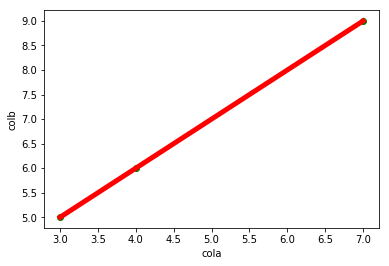

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
def kernel(point,xmat, k):
    m,n = np.shape(xmat)
    weights = np.mat(np1.eye((m)))
    for j in range(m):
        diff = point - X[j]
        weights[j,j] = np.exp(diff*diff.T/(-2.0*k**2))
    return weights
def localWeight(point,xmat,ymat,k):
    wei = kernel(point,xmat,k)
    W=(X.T*(wei*X)).I*(X.T*(wei*ymat.T))
    return W
def localWeightRegression(xmat,ymat,k):
    m,n = np.shape(xmat)
    ypred = np.zeros(m)
    for i in range(m):
        ypred[i] = xmat[i]*localWeight(xmat[i],xmat,ymat,k)
    return ypred
data = pd.read_csv('web.csv')
cola = np.array(data.cola)
colb = np.array(data.colb)
mcola = np.mat(cola)
mcolb = np.mat(colb)
m= np.shape(mcola)[1]
one = np.ones((1,m),dtype=int)
X= np.hstack((one.T,mcola.T))
print(X.shape)
ypred = localWeightRegression(X,mcolb,2)
SortIndex = X[:,1].argsort(0)
xsort = X[SortIndex][:,0]
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.scatter(cola,colb,color='green')
ax.plot(xsort[:,1],ypred[SortIndex],color='red',linewidth=5)
plt.xlabel('cola')
plt.ylabel('colb')
plt.show()